# Terje testing some Spark!

In [1]:
# from pyspark import SparkContext, SparkConf # Already included here
import glob
import re
import operator
from operator import add
from ast import literal_eval

[u'Wuthering Heights by Emily Bronte', u'CHAPTER I', u'1801.--I have just returned from a visit to my landlord--the solitary', u'neighbour that I shall be troubled with.  This is certainly a beautiful', u'country!  In all England, I do not believe that I could have fixed on a']
[(u'and', 4748), (u'the', 4572), (u'i', 3573), (u'to', 3536), (u'a', 2324), (u'of', 2224), (u'he', 1949), (u'you', 1736), (u'her', 1551), (u'in', 1483), (u'his', 1424), (u'it', 1311), (u'she', 1283), (u'that', 1204), (u'was', 1127), (u'my', 1106), (u'me', 1065), (u'not', 938), (u'as', 936), (u'him', 925), (u'for', 843), (u'on', 815), (u'with', 806), (u'at', 785), (u'be', 727), (u'had', 689), (u'but', 687), (u'is', 654), (u'have', 633), (u'from', 486)]
Wuthering Heights line count (blank lines omitted): 10008


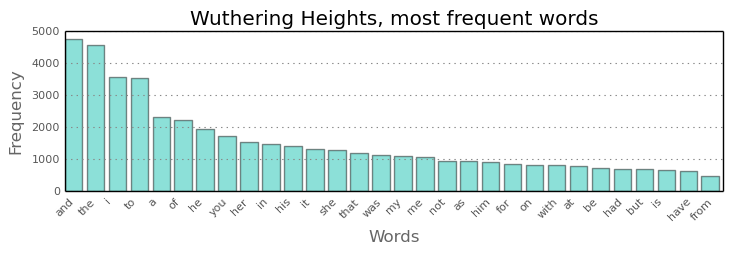

In [38]:
# https://jupyter.org/
# https://blog.jupyter.org/

import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# Count lines in the novel 'Wuthering Heights'
import os.path
import re

baseDir = os.path.join('data')
inputPath = os.path.join('terje', 'wuthering_heights.txt')
fileName = os.path.join(baseDir, inputPath)

rawData = sc.textFile(fileName, 4).filter(lambda a: len(a.strip()) > 0) # NOTE: Parallelize on 4 nodes
print rawData.take(5)
wutheringHeightsCount = rawData.count()

def parse_string(string_to_parse):
    wordlist = re.compile("([\w][\w]*'?\w?)").findall(string_to_parse)
    return [s.lower() for s in wordlist]

wordList = rawData.flatMap(lambda x: parse_string(x)).map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
n = 30
print wordList.takeOrdered(n, key = lambda x: -x[1])
the_wordlist = wordList.takeOrdered(n, key = lambda x: -x[1])

print "Wuthering Heights line count (blank lines omitted):", wutheringHeightsCount

#fig = plt.figure(figsize=(8,4.2), facecolor='white', edgecolor='white')
fig, axes = plt.subplots(figsize=(8.5, 2), frameon=False, facecolor='white', edgecolor='white')
plt.axis([0, n, 0, the_wordlist[0][1]])
plt.grid(b=True, which='major', axis='y', color="#888888", linewidth=.8)
plt.xlabel('Words')
plt.ylabel('Frequency')
barlist = plt.bar(range(n), [freq for (word, freq) in the_wordlist[0:n]], alpha = 0.45, color='#00bbaa')
axes.tick_params(labelcolor='#555555', labelsize='8')
axes.set_title("Wuthering Heights, most frequent words")
axes.set_xticklabels([word for (word, freq) in the_wordlist[0:n]], rotation=45, ha='center')
for axis, ticks in [(axes.get_xaxis(), range(0, n)), (axes.get_yaxis(), range(0, the_wordlist[0][1]+1000, 1000))]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#666666')
pass

In [8]:
inputPath = os.path.join('terje', 'iis3.log')
fileName = os.path.join(baseDir, inputPath)

rawData = sc.textFile(fileName)
print "Lines in file:" + rawData.count() + "\n"
# Count action: Spark reads in data, sums within partitions (1 in this example), and combines result in driver

errors = rawData.filter(lambda line: "139.116.15.40" in line).collect()
print errors[1:3]
errors = rawData.filter(lambda line: line.startswith("139.116.15.37,POSTEN")).collect()
print len(errors)
# rawData.filter(lambda x: x.contains("LMKBRUKER")).count()

[u'139.116.15.40,LMKBRUKER,7/28/2014,0:08:31,W3SVC926698324,POSAP312,139.114.162.25,328,734,653,200,0,POST,/VHWebservice/VHWebServices.asmx,-,', u'139.116.15.40,LMKBRUKER,7/28/2014,0:10:13,W3SVC926698324,POSAP312,139.114.162.25,328,734,653,200,0,POST,/VHWebservice/VHWebServices.asmx,-,']
811


In [7]:
# More 'Wuthering Heights' manipulation - counting and sorting word requency
inputPath = os.path.join('terje', 'wuthering_heights.txt')
outputPath = os.path.join('terje', 'wuthering_heights_out1')

fileName = os.path.join(baseDir, inputPath)
fileNameOut = os.path.join(baseDir, outputPath)

rawData = sc.textFile(fileName) # NOTE: No parallelization, 1 results file created
# wc = rawData.flatMap(lambda x: x.split(' ')).map(lambda x: (x, 1)).reduceByKey(add)
# wc = rawData.flatMap(lambda x: re.compile("([\w][\w]*'?\w?)").findall(x)).map(lambda x: (x, 1)).reduceByKey(add)
wc = rawData.flatMap(lambda x: [x.lower() for x in re.compile("([\w][\w]*'?\w?)").findall(x)]).map(lambda x: (x, 1)).reduceByKey(add)
# re.compile("([\w][\w]*'?\w?)").findall("This is so cool!")

wc.saveAsTextFile(fileNameOut)
print "Textfile saved!"

Textfile saved!


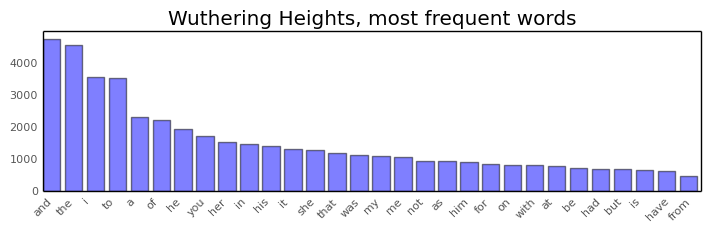

In [135]:
n = 30
fig, axes = plt.subplots(figsize=(8.5, 2), frameon=False, facecolor='white', edgecolor='white')
fig.set_frameon(False) # ??
axes.tick_params(labelcolor='#555555', labelsize='8')
plt.bar(range(n), [freq for (word, freq) in words_sorted[0:n]], alpha = 0.5)
#plt.grid(color="#bbbbbb", linewidth=.8, linestyle='-')
max_y = words_sorted[0][1]
for axis, ticks in [(axes.get_xaxis(), range(0, n)), (axes.get_yaxis(), range(0, max_y, 1000))]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#666666')
axes.set_title("Wuthering Heights, most frequent words")
axes.set_xticklabels([word for (word, freq) in words_sorted[0:n]], rotation=45, ha='center')
plt.show()


In [66]:
outputPathSorted = os.path.join('terje', 'wuthering_heights_sorted.txt')
fileNameOutSorted = os.path.join(baseDir, outputPathSorted)

files = glob.glob(fileNameOut + "/part-*")
words = []
for f in files:
    for e, line in enumerate(open(f, "rb")):
        words.append(tuple(literal_eval(line.strip())))

# words_sorted = sorted(words, key=operator.itemgetter(1, 0), reverse=True) # Sort on 1) frequency 2) word
words_sorted = sorted(words, key = lambda x: (-x[1], x[0]))
print words_sorted[0:20] # Print some of the highest frequencies

f = open(fileNameOutSorted, "wb")
for w, freq in words_sorted:
    f.write(w + ";" + str(freq) + "\n")
    
f.close()

[(u'and', 4748), (u'the', 4572), (u'i', 3573), (u'to', 3536), (u'a', 2324), (u'of', 2224), (u'he', 1949), (u'you', 1736), (u'her', 1551), (u'in', 1483), (u'his', 1424), (u'it', 1311), (u'she', 1283), (u'that', 1204), (u'was', 1127), (u'my', 1106), (u'me', 1065), (u'not', 938), (u'as', 936), (u'him', 925)]


### Week 2 lectures
### -----------------------

In [12]:
rdd = sc.parallelize(range(1, 26, 1))
# No computation happens, lazy evaluation. Spark saves the "recipe" for creating the result here
result = rdd.map(lambda x: x * 2).collect() # lambdas are closures/actions passed to workers
print result

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]


In [14]:
result = rdd.filter(lambda x: x % 3 == 0).collect()
print result

[3, 6, 9, 12, 15, 18, 21, 24]


In [21]:
mydata = range(1, 13, 1) + range(1, 16, 1)
print mydata
rdd2 = sc.parallelize(mydata)
print rdd2.distinct().collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [25]:
print rdd2.map(lambda x: [x, x + 5]).collect()
print rdd2.flatMap(lambda x: [x, x + 5]).distinct().collect()

[[1, 6], [2, 7], [3, 8], [4, 9], [5, 10], [6, 11], [7, 12], [8, 13], [9, 14], [10, 15], [11, 16], [12, 17], [1, 6], [2, 7], [3, 8], [4, 9], [5, 10], [6, 11], [7, 12], [8, 13], [9, 14], [10, 15], [11, 16], [12, 17], [13, 18], [14, 19], [15, 20]]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [4]:
rdd3 = sc.parallelize([1,2,3,4,5,6,7,8])
result = rdd3.reduce(lambda a, b: a * b)
print(1*2*3*4*5*6*7*8)
print result

40320
40320


In [9]:
rdd4 = sc.parallelize([5,8,1,2,10,17])
rdd4.takeOrdered(3, lambda s: -1 * s) # Take 3 elements, DESC sorting

[17, 10, 8, 5]

In [3]:
rdd5 = sc.parallelize([(1,'a'), (2,'b'), (3,'c'),(2,'d'),(2,'e')]) # Key-Value pairs, a Pairs RDD, each element is a pair tuple
print rdd5.sortByKey().collect()

[(1, 'a'), (2, 'b'), (2, 'd'), (2, 'e'), (3, 'c')]


In [6]:
rdd6 = sc.parallelize([(1,1), (2,2), (3,3), (2,2), (2,2)]) # Key-Value pairs, a Pairs RDD, each element is a pair tuple
print rdd6.reduceByKey(lambda a, b: a * b).collect()

[(1, 1), (2, 8), (3, 3)]


In [22]:
rdd7 = sc.parallelize([(1,'a'), (2,'b'), (3,'c'),(2,'d'),(2,'e')]) # Key-Value pairs, a Pairs RDD, each element is a pair tuple
result = rdd7.groupByKey().partitionBy(1).map(lambda x: sorted(x[1].data)).collect()
# Be careful, as groupByKey can cause a lot of data movement on huge arrays
#result
for x in result:
    print x

['a']
['b', 'd', 'e']
['c']


## pySpark shared variables
### Broadcast variables
Efficiently send large, read-only variable to workers
Saved at workers to use in one or more Spark operations
It's like sending a large, read-only lookup table to all workers
### Accumulators
Aggregate values from workers back to driver
Only driver can access value from accumulator
For tasks, accumulators are write-only
Use to count errors seen in RDD across all workers

In iterative or repeated computations, broadcast variables avoid the problem of SENDING the SAME data to workers.
Accumulators can NOT be used by Spark workers to efficiently READ values during distributed computations.

In [87]:
my_huge_dict = {'a': 20, 'b': 30, 'd': 50}
broadcastVar = sc.broadcast(my_huge_dict) # Read-only, sent to all workers in a closure
broadcastVar.value
my_letters = sc.parallelize(['a','b','c','d','e'])

def my_lookup_function(letter):
    a = 0
    if letter in broadcastVar.value:
        a = broadcastVar.value[letter]
    return a

letter_count = my_letters.map(my_lookup_function).collect()
print letter_count

[20, 30, 0, 50, 0]


50

In [65]:
# Using accumulators
inputPath = os.path.join('terje', 'wuthering_heights.txt')
fileName = os.path.join(baseDir, inputPath)

rawData = sc.textFile(fileName) # NOTE: No parallelization, 1 results file created
# print rawData
blankLines = sc.accumulator(0) # Init

def countBlankLines(line):
    global blankLines # Important!
    if len(line.strip()) == 0:
        blankLines += 1

blankLinesCount = rawData.foreach(countBlankLines)
print "Number of blank lines in 'Wuthering Heights' is %d" % blankLines.value

Number of blank lines in 'Wuthering Heights' is 2076


In [59]:
blankLines = sc.accumulator(0) # Init
rawData = sc.parallelize(["A line", "", "another line", "yes", "", "", "Last one!"])
def f(line):
    global blankLines
    if len(line.strip()) == 0:
        blankLines += 1 # Seen at worker as a write-only variable, can NOT see the value!
    
rawData.foreach(f)
print "Number of blank lines is %d" % blankLines.value

Number of blank lines is 3


In [75]:
accum = sc.accumulator(0)
sc.parallelize(range(1, 10, 1)).foreach(lambda x: accum.add(x))
print accum.value

45


In [7]:
import string
#string.split("This    is a string... yes")
print len("This    is a string... yes".split())

5


In [26]:
# TIP: Use https://regex101.com/ to test your regex!
import re
pattern = '^(\S+) "(\S*)(\s?)"'
match = re.search(pattern, 'Balle "Klorin "')
#match = re.search(pattern, 'Balle "Klorin"')
print match.group(1) + "#" + match.group(2)

Balle#Klorin


In [2]:
my_list = []
my_tuple = ('Testing tuple', 22)
my_list.append(my_tuple)
print my_list

[('Testing tuple', 22)]


In [3]:
my_tuples = [('One', 1), ('Two', 2), ('Three', 3)]
print dict(my_tuples)

{'Three': 3, 'Two': 2, 'One': 1}
